In [99]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,classification_report,recall_score,f1_score,confusion_matrix

In [3]:
df = pd.read_csv(r"C:\Users\hp\OneDrive\Desktop\ML project 5\Airline customer satisfaction level.csv")

In [4]:
df.head(5)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [5]:
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9974.000000
mean,4999.50000,64950.978500,39.303700,1198.823800,2.731500,3.038900,2.753600,2.96890,3.208800,3.240300,3.411300,3.335500,3.366000,3.346500,3.619900,3.285600,3.627400,3.268200,14.785400,15.242130
std,2886.89568,37420.905082,15.116478,1001.774138,1.328226,1.528077,1.403241,1.28425,1.339769,1.350755,1.326012,1.340567,1.288336,1.311415,1.190028,1.269013,1.181401,1.321077,38.217509,38.810195
min,0.00000,8.000000,7.000000,31.000000,0.000000,0.000000,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2499.75000,32330.500000,27.000000,413.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0.000000,0.000000
50%,4999.50000,64941.000000,40.000000,852.500000,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,7499.25000,97579.750000,51.000000,1747.000000,4.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,13.000000,13.000000
max,9999.00000,129863.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1305.000000,1280.000000


In [6]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [7]:
df.drop(columns=["Unnamed: 0"],inplace=True )

In [8]:
df

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,124365,Male,Loyal Customer,50,Business travel,Business,3599,3,3,3,...,5,5,5,5,5,5,4,12,24.0,satisfied
9996,22044,Male,Loyal Customer,38,Business travel,Business,3873,5,5,5,...,4,4,4,4,3,4,5,0,0.0,satisfied
9997,14057,Female,Loyal Customer,39,Business travel,Business,319,4,4,4,...,4,4,4,4,3,4,2,0,0.0,satisfied
9998,113848,Male,Loyal Customer,52,Business travel,Business,1363,5,5,5,...,4,4,3,4,5,4,5,1,11.0,satisfied


In [9]:
df.columns = df.columns.str.replace(" ","_")

In [10]:
df.columns

Index(['id', 'Gender', 'Customer_Type', 'Age', 'Type_of_Travel', 'Class',
       'Flight_Distance', 'Inflight_wifi_service',
       'Departure/Arrival_time_convenient', 'Ease_of_Online_booking',
       'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort',
       'Inflight_entertainment', 'On-board_service', 'Leg_room_service',
       'Baggage_handling', 'Checkin_service', 'Inflight_service',
       'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes',
       'satisfaction'],
      dtype='object')

Text(0.5, 1.0, 'Number of satisfied and unsatisfied customer')

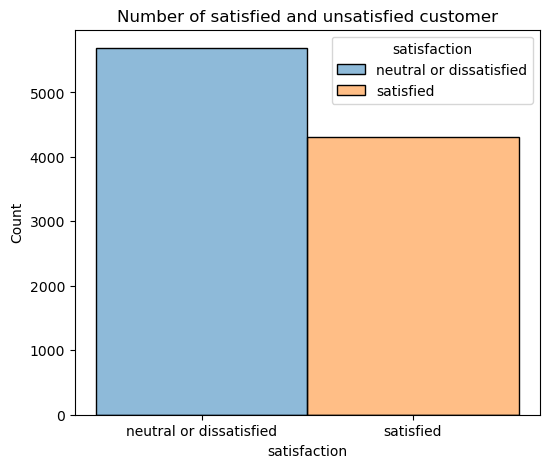

In [11]:
plt.figure(figsize=(6,5))
sns.histplot(data=df,x="satisfaction",hue="satisfaction")
plt.xlabel("satisfaction")
plt.ylabel("Count")
plt.title("Number of satisfied and unsatisfied customer")


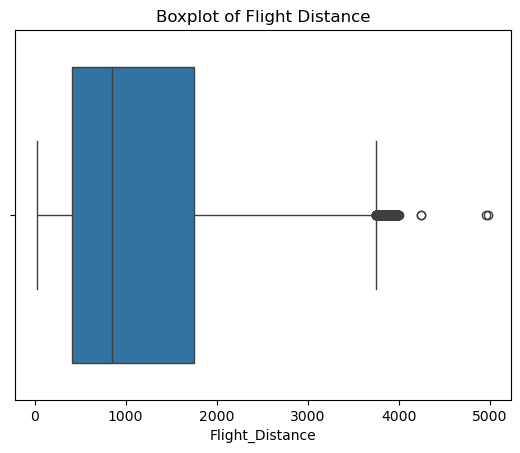

In [22]:
sns.boxplot(data=df,x="Flight_Distance")
plt.title("Boxplot of Flight Distance")
plt.show()


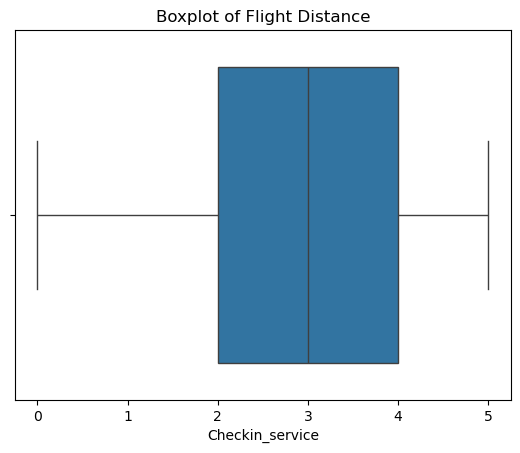

In [50]:
sns.boxplot(data=df,x="Checkin_service")
plt.title("Boxplot of Flight Distance")
plt.show()


In [54]:
df.drop(columns="id",inplace=True)

In [56]:
df.isnull().sum()


Gender                                0
Customer_Type                         0
Age                                   0
Type_of_Travel                        0
Class                                 0
Flight_Distance                       0
Inflight_wifi_service                 0
Departure/Arrival_time_convenient     0
Ease_of_Online_booking                0
Gate_location                         0
Food_and_drink                        0
Online_boarding                       0
Seat_comfort                          0
Inflight_entertainment                0
On-board_service                      0
Leg_room_service                      0
Baggage_handling                      0
Checkin_service                       0
Inflight_service                      0
Cleanliness                           0
Departure_Delay_in_Minutes            0
Arrival_Delay_in_Minutes             26
satisfaction                          0
dtype: int64

In [58]:
df["Arrival_Delay_in_Minutes"].dropna(axis=0,inplace=True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             10000 non-null  int32  
 1   Customer_Type                      10000 non-null  int32  
 2   Age                                10000 non-null  int64  
 3   Type_of_Travel                     10000 non-null  int32  
 4   Class                              10000 non-null  int32  
 5   Flight_Distance                    10000 non-null  int64  
 6   Inflight_wifi_service              10000 non-null  int64  
 7   Departure/Arrival_time_convenient  10000 non-null  int64  
 8   Ease_of_Online_booking             10000 non-null  int64  
 9   Gate_location                      10000 non-null  int64  
 10  Food_and_drink                     10000 non-null  int64  
 11  Online_boarding                    10000 non-null  int6

In [64]:
lable_col=["Gender","Customer_Type","Type_of_Travel","Class","satisfaction"]
for col in lable_col:
    df[col]=LabelEncoder().fit_transform(df[col])

In [71]:
x = df.drop("satisfaction",axis=1)
y = df["satisfaction"]

In [79]:
sl = StandardScaler()
sl.fit_transform(x)

array([[ 1.0218384 , -0.46772753, -1.740155  , ...,  1.31096611,
         0.26728876,  0.07106403],
       [ 1.0218384 ,  2.13799688, -0.94627961, ..., -1.71701889,
        -0.36072705, -0.23814858],
       [-0.97862832, -0.46772753, -0.88012333, ...,  1.31096611,
        -0.38689438, -0.39275488],
       ...,
       [-0.97862832, -0.46772753, -0.02009166, ..., -0.96002264,
        -0.38689438, -0.39275488],
       [ 1.0218384 , -0.46772753,  0.83994   , ...,  1.31096611,
        -0.36072705, -0.10930999],
       [-0.97862832, -0.46772753,  0.1122209 , ...,  0.55396986,
        -0.38689438, -0.39275488]])

In [81]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [93]:
dc = DecisionTreeClassifier()


In [95]:
dc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
accuracy_score,precision_score,classification_report,recall_score,f1_score,confusion_matrix

In [119]:
y_pred = dc.predict(x_test)

In [170]:
print("accuracy_score:",accuracy_score(y_test,y_pred)*100)

accuracy_score: 92.75


In [166]:
print("classification_report:\n",classification_report(y_test,y_pred))




classification_report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94      1174
           1       0.91      0.91      0.91       826

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000



In [174]:
print("recall_score:",recall_score(y_test,y_pred)*100)

recall_score: 91.16222760290556


In [176]:
print("f1_score:",f1_score(y_test,y_pred)*100)

f1_score: 91.21744397334949


In [182]:
print("confusion_matrix:\n",confusion_matrix(y_test,y_pred))

confusion_matrix:
 [[1102   72]
 [  73  753]]
